# DATA INSPECTION AND DATA CLEANING

In this notebook we describe the procedure that we followed in order to inspect and clean the dataset from the outliers. \
Each cell outline a different step in this procedure and the lines of code are accompanied by comments that describe their behavior.
All the variables have a self-explanatory name, whereas in some cases they are followed by some comments to clearify their function. 

The only step required to complete this task is to **load the zipped dataset 'public_data.zip' inside the same folder where this file is stored**.

### DATA IMPORT

In [1]:
# Import the libraries
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import zipfile

In [2]:
# Specify the main directory path and the zip file path to extract
parent_directory = os.path.dirname(os.getcwd())
zip_file_path = os.path.join(os.getcwd(), 'public_data.zip')

# Specify the directory where you want to extract the contents
extract_dir = '/path/to/your/extracted_directory'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(os.getcwd())

In [3]:
file_path = os.path.join(os.getcwd(), 'public_data.npz')
with np.load(file_path, allow_pickle=True) as public_data:
    images = public_data['data']
    labels = public_data['labels']

### DATA PROFILING

In [4]:
original_healthy_idxs = np.where(labels == 'healthy')[0]
original_unhealthy_idxs = np.where(labels == 'unhealthy')[0]
print(f'Number of images in the original dataset: {images.shape[0]}')
print(f'Number of samples of healthy class: {len(original_healthy_idxs)}')
print(f'Number of samples of unhealthy class: {len(original_unhealthy_idxs)}')

Number of images in the original dataset: 5200
Number of samples of healthy class: 3199
Number of samples of unhealthy class: 2001


In [5]:
# Check if the directory exists
if not os.path.exists(os.path.join(os.getcwd(), 'All_images')):
    # If it doesn't exist, create it
    os.makedirs('All_images')

# Change the working directory to the specified directory for saving the image
directory = os.chdir(os.path.join(os.getcwd(), 'All_images')) 

# Print the list of files in the directory before saving the image
print("Before saving")   
print(os.listdir(os.getcwd()))   
for i in range(images.shape[0]):
    # Save the image with the filename "cat.jpg"
    scaled_image = (images[i]).astype(np.uint8)
    filename = f'{i}.jpg'
    cv2.imwrite(filename, scaled_image) 

# Print the list of files in the directory after saving the image
print("After saving")  
print(os.listdir(os.getcwd()))

Before saving
[]
After saving
['63.jpg', '823.jpg', '4217.jpg', '3578.jpg', '2666.jpg', '5109.jpg', '2100.jpg', '4571.jpg', '1409.jpg', '189.jpg', '2114.jpg', '4565.jpg', '4203.jpg', '2672.jpg', '77.jpg', '837.jpg', '2882.jpg', '3544.jpg', '5135.jpg', '1353.jpg', '1435.jpg', '3222.jpg', '2128.jpg', '3236.jpg', '4559.jpg', '1421.jpg', '1347.jpg', '2896.jpg', '3550.jpg', '5121.jpg', '638.jpg', '2869.jpg', '1390.jpg', '604.jpg', '2699.jpg', '2841.jpg', '3587.jpg', '162.jpg', '176.jpg', '2855.jpg', '3593.jpg', '88.jpg', '610.jpg', '1384.jpg', '4773.jpg', '2302.jpg', '2464.jpg', '4015.jpg', '1179.jpg', '2470.jpg', '4001.jpg', '4767.jpg', '3008.jpg', '2316.jpg', '3020.jpg', '4997.jpg', '1637.jpg', '1151.jpg', '2458.jpg', '3746.jpg', '4029.jpg', '3752.jpg', '1145.jpg', '1623.jpg', '3034.jpg', '4983.jpg', '4968.jpg', '1810.jpg', '3961.jpg', '3975.jpg', '1804.jpg', '348.jpg', '360.jpg', '4954.jpg', '3785.jpg', '406.jpg', '1192.jpg', '1186.jpg', '412.jpg', '3791.jpg', '3949.jpg', '4940.jpg', '47

In [6]:
# Function used to normalize the images
def normalize_images(data):
    images = []
    for img in data:
        img = (img / 255).astype(np.float32)
        if img is not None:
            images.append(img)
    return np.array(images)

normalized_images = normalize_images(images)

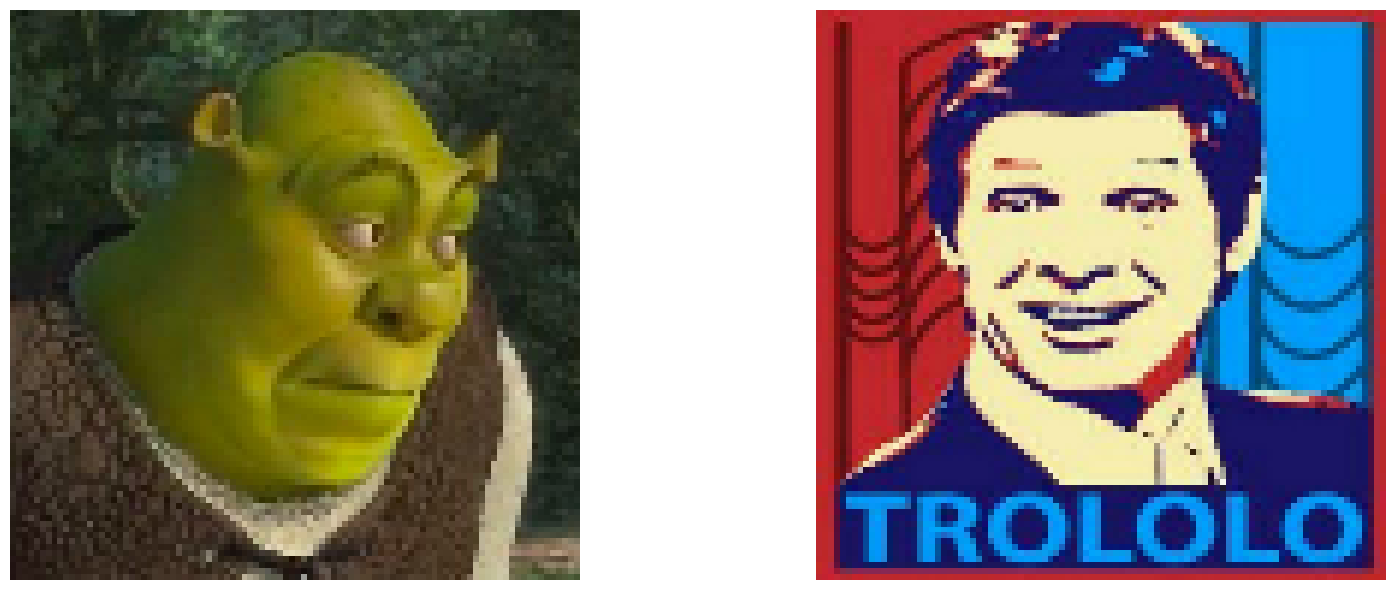

In [7]:
# Plotting the outliers detected by inspecting the previously saved images
fig, axs = plt.subplots(1,2, figsize = (18,6))
axs[0].imshow(normalized_images[58])
axs[0].axis('off')
axs[1].imshow(normalized_images[338])
axs[1].axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Compare the array of the shreck image with all the other images in order
#  to obtain the indexes of all the shreck images
shreck_image = images[58]
idxs_shreck = []
screck_flat = shreck_image.flatten()
for i in range(images.shape[0]):
    current_image = images[i].flatten()
    if all(current_image == screck_flat):
        idxs_shreck.append(i)

# Compare the array of the trololo image with all the other images in order
#  to obtain the indexes of all the trololo images
trololo_image = images[338]
idxs_trololo = []
trololo_flat = trololo_image.flatten()
for i in range(images.shape[0]):
    current_image = images[i].flatten()
    if all(current_image == trololo_flat):
        idxs_trololo.append(i)

In [9]:
print(f'Number of shreck outliers: {len(idxs_shreck)}')
print(f'Number of trololo outliers: {len(idxs_trololo)}')
print(f'First 10 shreck idxs: {idxs_shreck[:10]}')
print(f'First 10 trololo idxs: {idxs_trololo[:10]}')

Number of shreck outliers: 98
Number of trololo outliers: 98
First 10 shreck idxs: [58, 95, 137, 138, 171, 207, 506, 571, 599, 622]
First 10 trololo idxs: [338, 412, 434, 486, 529, 701, 723, 725, 753, 783]


### DATA CLEANING

In [10]:
# create a shreck mask to apply to the indexes of the original dataset
#  where the idxs of shreck images will be equal to 0 (false)
mask_shreck = np.ones(images.shape[0], dtype=bool)
mask_shreck[idxs_shreck] = False

# create a trololo mask to apply to the indexes of the original dataset
#  where the idxs of shreck images will be equal to 0 (false)
mask_trololo = np.ones(images.shape[0], dtype=bool)
mask_trololo[idxs_trololo] = False

#combine shreck and trololo masks
combined_masks = np.logical_and(mask_shreck,mask_trololo)

# Store the images that contains only valid images, that is the ones whose index 
# on the mask is equal to 1
new_images = images[combined_masks]
new_labels = labels[combined_masks]

In [11]:
# Create the cleaned dataset and store it in the main project folder
file_name = 'cleaned_dataset.npz'
clean_file_path = os.path.join(parent_directory, file_name)
np.savez(clean_file_path,data=new_images,labels=new_labels)

### INSPECT THE NEW CLEANED DATASET

In [12]:
with np.load(clean_file_path, allow_pickle=True) as public_data:
    images = public_data['data']
    labels = public_data['labels']

In [13]:
healthy_idxs = np.where(labels == 'healthy')[0]
unhealthy_idxs = np.where(labels == 'unhealthy')[0]
print(f'Number of images in the cleaned dataset: {images.shape[0]}')
print(f'Number of healthy class: {len(healthy_idxs)}')
print(f'Number of unhealthy class: {len(unhealthy_idxs)}')
print(f'Healthy outliers removed: {len(original_healthy_idxs) - len(healthy_idxs)}')
print(f'Unhealthy outliers removed: {len(original_unhealthy_idxs) - len(unhealthy_idxs)}')

Number of images in the cleaned dataset: 5004
Number of healthy class: 3101
Number of unhealthy class: 1903
Healthy outliers removed: 98
Unhealthy outliers removed: 98


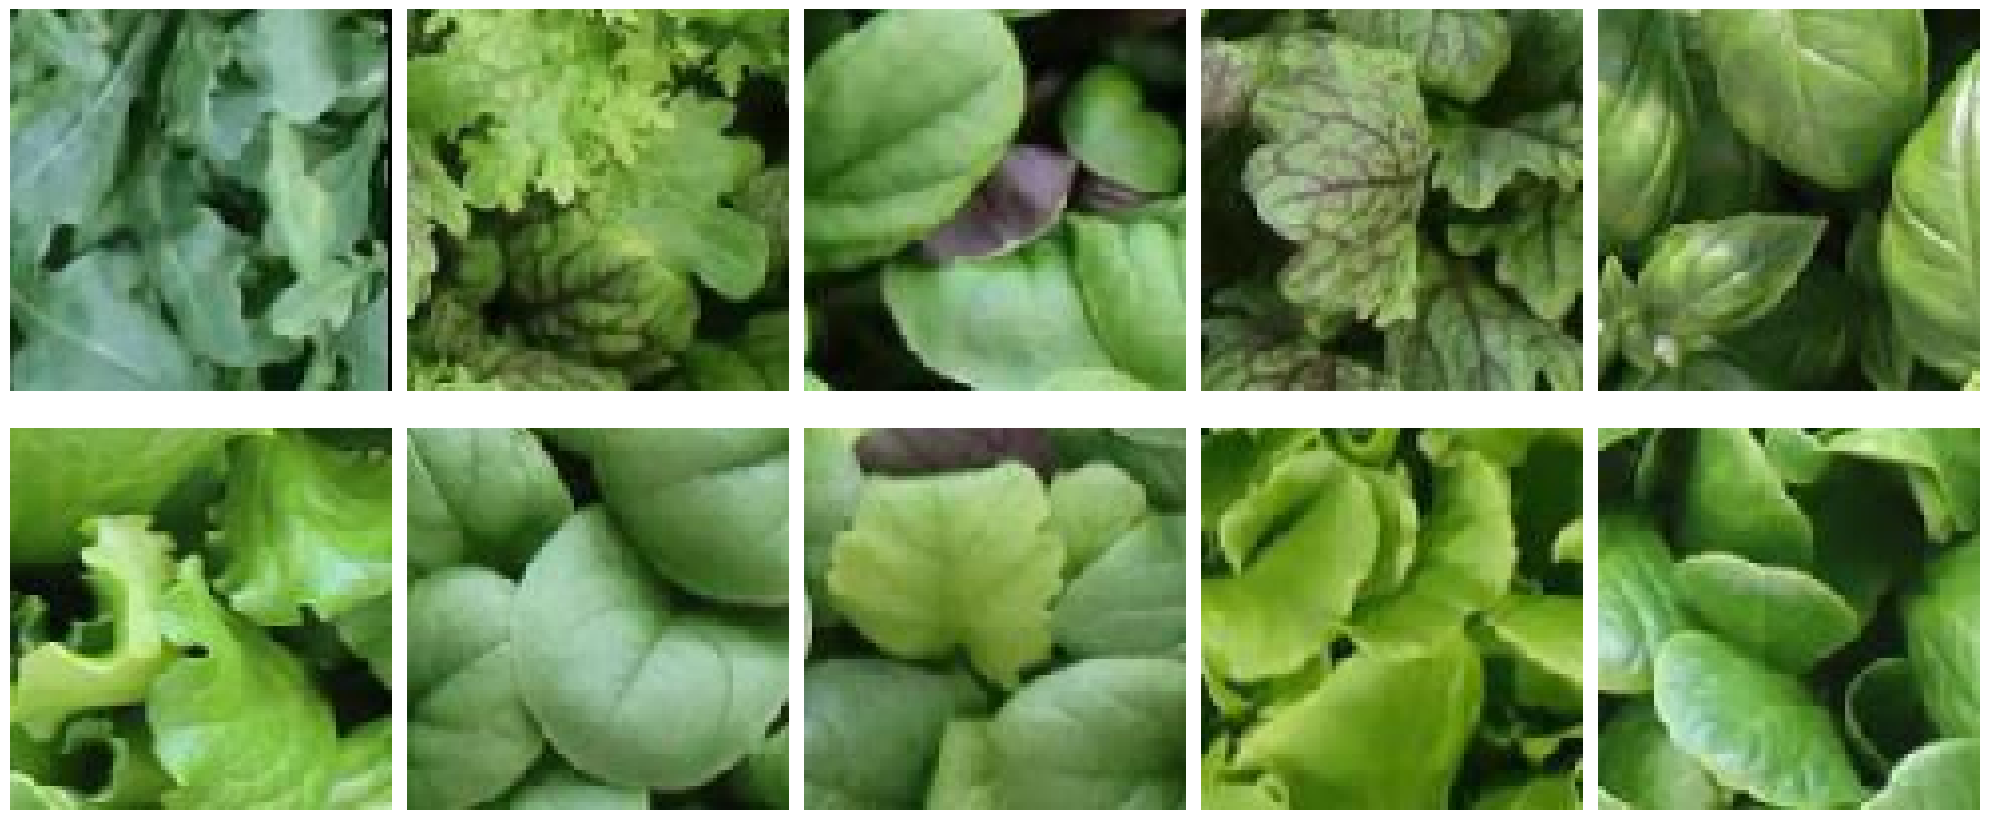

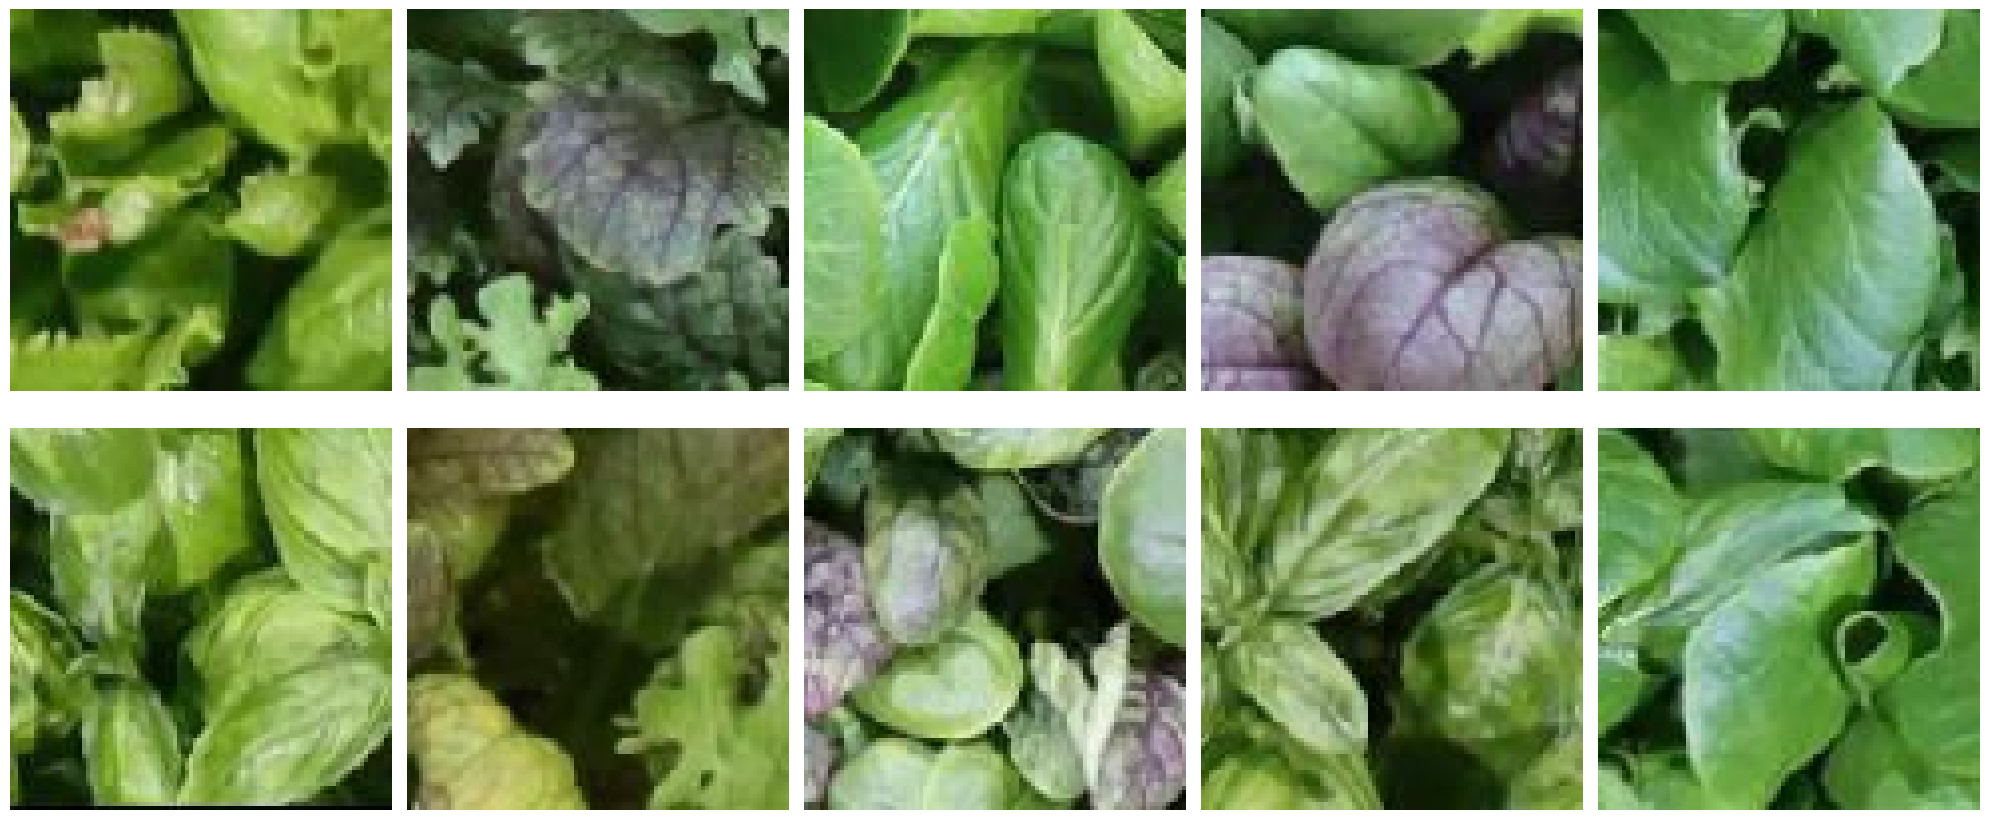

In [14]:
# Normalize the new images
images = normalize_images(images)

# Number of images to display
num_img = 10

# Select 10 random healthy and unhealthy images to display
display_healthy = np.random.choice(healthy_idxs, 10)
display_unhealthy = np.random.choice(unhealthy_idxs, 10)

# Create subplots for healthy plants
fig, axes = plt.subplots(2, num_img//2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i%2, i%num_img//2]
    ax.imshow(np.clip(images[display_healthy[i]], 0, 255))  # Display clipped item images
    ax.axis('off')
plt.tight_layout()
plt.show()

# Create subplots for displaying unhealthy plants
fig, axes = plt.subplots(2, num_img//2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i%2, i%num_img//2]
    ax.imshow(np.clip(images[display_unhealthy[i]], 0, 255))  # Display clipped item images
    ax.axis('off')
plt.tight_layout()
plt.show()